***

*Course:* [Math 444](https://people.math.wisc.edu/~hlyu36/GNiDS/) - Graphs and Networks in Data Science (MMiDS) - Fall 2023

*Author:* [Hanbaek Lyu](https://hanbaeklyu.com), Department of Mathematics, University of Wisconsin-Madison  

***

In [5]:
### Load some packages 

import networkx as nx # for handling graphs/networks 
import numpy as np # for basic scientific computing 
import matplotlib.pyplot as plt # for plotting
import matplotlib.gridspec as gridspec


# RW sampling

In [6]:
def RW(G, x0=None, steps=1, return_history=False):
    # simple symmetric random walk on graph G 
    # initialization at x0
    if x0 is None:
        x = np.random.choice(G.nodes())
    else:
        x = x0
    
    history = []
    for i in np.arange(steps):
        if len(list(G.neighbors(x))) == 0:
            print("RW is stuck at isolated node")
            x = np.random.choice(G.nodes()) # re-initialize uniformly at random
        else: 
            x = np.random.choice(list(G.neighbors(x)))

        if return_history:
            history.append(x)
        
    if not return_history: 
        return x 
    else: 
        return history

In [7]:
def IID_sampling(G, steps=1):
    # sample uniformly random nodes independently 'steps' times
    history = []
    for i in np.arange(steps):
        x = np.random.choice(G.nodes()) # re-initialize uniformly at random
        history.append(x)
    return history

In [8]:
# Initialize graph 
G = nx.Graph()

# Load COVID_PPI.txt edgelist
path = "../Data/Caltech36.txt"
edgelist = list(np.genfromtxt(path, delimiter=",", dtype=str)) 

# Add in all edges in the edgelist to G
for e in edgelist:
    G.add_edge(e[0], e[1]) 

Number of nodes: 769
Number of edges: 16656
edge density: 0.05640442132639792
Avg. clustering coefficient: 0.4091173048334611
Avg. shortest path length: 2.3378480449470755
Number of nodes: 82
Number of edges: 563


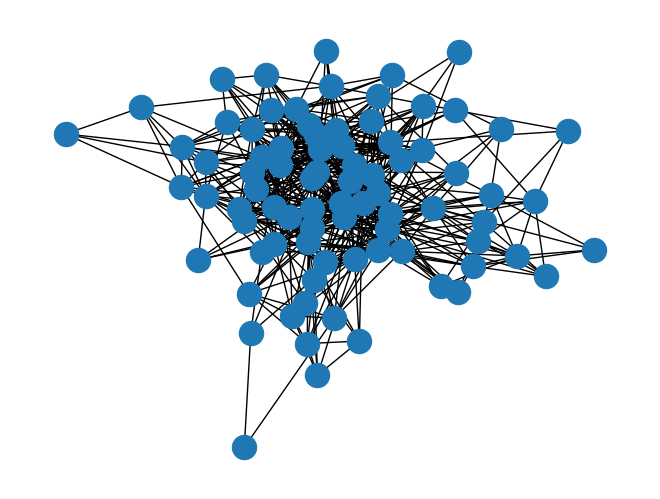

In [9]:
## Load Caltech Facebook graph

# Initialize graph 
G = nx.Graph()

# Load COVID_PPI.txt edgelist
path = "../Data/Caltech36.txt"
edgelist = list(np.genfromtxt(path, delimiter=",", dtype=str)) 

# Add in all edges in the edgelist to G
for e in edgelist:
    G.add_edge(e[0], e[1]) 
    
# Print out the number of nodes and edges in G

print("Number of nodes:", len(list(G.nodes())))
print("Number of edges:", len(list(G.edges())))
print("edge density:", nx.density(G))
G0 = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
print("Avg. clustering coefficient:", nx.average_clustering(G0))
print("Avg. shortest path length:", nx.average_shortest_path_length(G0))


# Perform a random walk and take an induced subgraph on a random walk trajectory 
RW_trajectory = RW(G0, steps=100, return_history=True)
H = G.subgraph(nodes=RW_trajectory)
print("Number of nodes:", len(list(H.nodes())))
print("Number of edges:", len(list(H.edges())))
nx.draw(H)

RW is stuck at isolated node


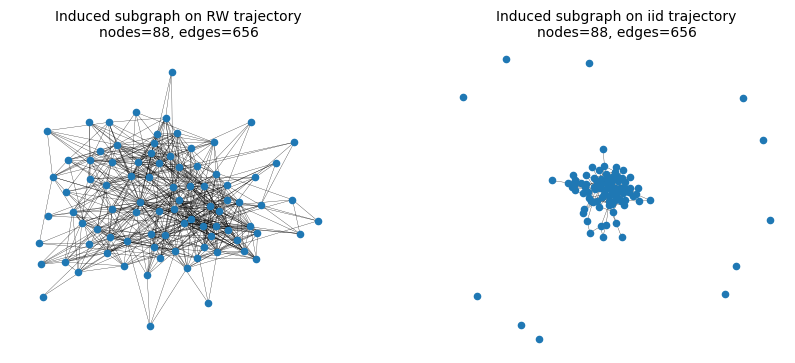

In [12]:
fig = plt.figure(figsize=[10,4], constrained_layout=False)
outer_grid = gridspec.GridSpec(nrows=1, ncols=2, wspace=0.3, hspace=0.1)

####
inner_grid = outer_grid[0,0].subgridspec(1, 1, wspace=0, hspace=0)
ax = fig.add_subplot(inner_grid[0, 0])

RW_trajectory = RW(G0, steps=100, return_history=True)
H = G.subgraph(nodes=RW_trajectory)
weights = [0.2 for u,v in H.edges]

nx.draw(H, with_labels=False, width=weights, node_size=20, ax=ax)
ax.set_title("Induced subgraph on RW trajectory" + "\n" +   "nodes={}, edges={}".format(len(list(H.nodes())), len(list(H.edges()))) , fontsize=10)

####
inner_grid = outer_grid[0,1].subgridspec(1, 1, wspace=0, hspace=0)
ax = fig.add_subplot(inner_grid[0, 0])

IID_trajectory = IID_sampling(G0, steps=100)
H1 = G.subgraph(nodes=IID_trajectory)
weights = [0.2 for u,v in H1.edges]

nx.draw(H1, with_labels=False, width=weights, node_size=20, ax=ax)
ax.set_title("Induced subgraph on iid trajectory" + "\n" + "nodes={}, edges={}".format(len(list(H.nodes())), len(list(H.edges()))), fontsize=10)

plt.savefig("subgraph_sampling", bbox_inches="tight")

# Empirical distribution of RW

In [16]:
def emp_dist_RW(G, k=100):
    RW_trajectory = RW(G, steps=k, return_history=True)
    nodes=list(G.nodes())

    emp_dist = {}
    for v in nodes: 
        emp_dist.update({v:0})
        
    
    for v in RW_trajectory: 
        j = emp_dist.get(v)
        emp_dist.update({v: j+1})

    emp_dist_list = [emp_dist.get(v) for v in nodes]
    
    return emp_dist, emp_dist_list

In [17]:
RW(G, steps=100, return_history=True)

['524',
 '69',
 '379',
 '647',
 '563',
 '612',
 '211',
 '483',
 '377',
 '79',
 '36',
 '511',
 '563',
 '344',
 '709',
 '537',
 '301',
 '630',
 '23',
 '249',
 '82',
 '23',
 '249',
 '279',
 '72',
 '745',
 '687',
 '649',
 '330',
 '233',
 '423',
 '14',
 '682',
 '371',
 '705',
 '236',
 '654',
 '176',
 '266',
 '43',
 '79',
 '498',
 '676',
 '273',
 '676',
 '377',
 '355',
 '263',
 '543',
 '489',
 '543',
 '364',
 '415',
 '714',
 '647',
 '563',
 '259',
 '223',
 '70',
 '285',
 '574',
 '251',
 '309',
 '315',
 '321',
 '701',
 '278',
 '368',
 '484',
 '458',
 '459',
 '83',
 '630',
 '258',
 '737',
 '275',
 '283',
 '691',
 '151',
 '728',
 '366',
 '420',
 '614',
 '446',
 '355',
 '30',
 '107',
 '524',
 '188',
 '322',
 '601',
 '371',
 '603',
 '759',
 '716',
 '320',
 '255',
 '630',
 '90',
 '107']

In [18]:
emp_dist, emp_dist_list = emp_dist_RW(G, k=1000)

RW is stuck at isolated node


In [19]:
def BA(G0=None, m0=1, m=1, n=100, alpha=1):
    # Barabasi-Albert model with baseline graph G = single node with m0 self-loops 
    # Each new node has m edges pointing to some nodes in the existing graph 
    # alpha=1 -> preferential attachment: The head of each new directed edge is chosen randomly with probability 
    # proportional to the degree
    # alpha=0 ->: Uniform attachment: The head of each new directed edge is chosen uniformly at random
    # alpha \notin\{0,1} -> nonlinear preferential attachment: The head of each new directed edge is chosen 
    # randomly with probability proportional to the degree^alpha
    
    if G0 is not None: 
        G = G0
    else: 
        G = nx.MultiGraph() # baseline graph with a single node and m0 self-loops 
        for i in np.arange(m0):
            G.add_edge(1,1)
        
    for s in np.arange(1,n):
        for j in np.arange(m):
            # form a degree distribution 
            degrees = np.asarray([G.degree(n)**(alpha) for n in G.nodes()])
            deg_dist = degrees*(1/np.sum(degrees))
            v = np.random.choice(G.nodes(), p=deg_dist)
            G.add_edge(s,v)
        
    return G
    

RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at

RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at

RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at

RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at

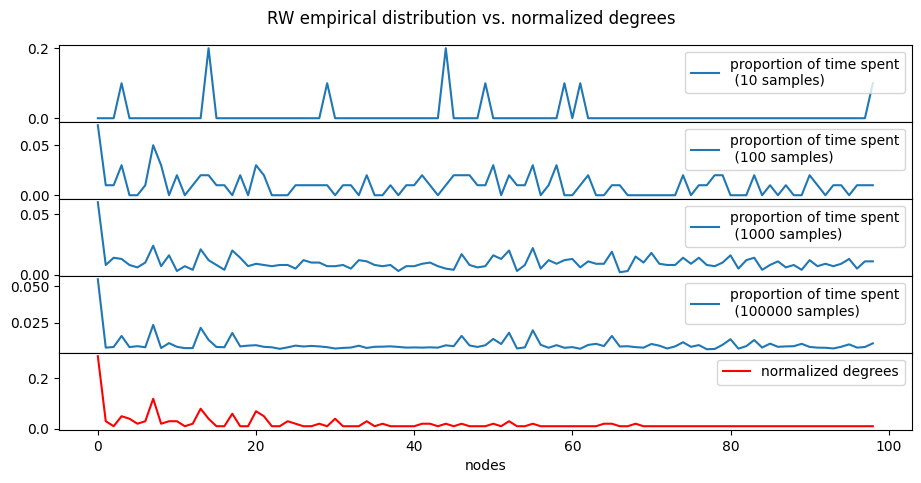

In [20]:
### Load Graph
#G = nx.erdos_renyi_graph(n=100,p=0.2)
G = BA(G0=None, m0=2, m=1, n=100, alpha=1)


### Plot empirical frequencies 
fig = plt.figure(figsize=[11,5], constrained_layout=False)
network_list = [""]
n_samples_display = 3
k_list = [10, 100, 1000, 100000]

outer_grid = gridspec.GridSpec(nrows=len(k_list)+1, ncols=1, wspace=0.5, hspace=0)

    
    
for i in np.arange(len(k_list)+1):
    if i < len(k_list):
        inner_grid = outer_grid[i,0].subgridspec(1, 1, wspace=0, hspace=0)

        k = k_list[i]
        emp_dist, a = emp_dist_RW(G, k=k)
        ax = fig.add_subplot(inner_grid[0, 0])
        ax.plot(np.asarray(a)/k, label='proportion of time spent' + "\n ({} samples)".format(k))
        ax.legend()
        #ax.set_xlabel("nodes")
        ax.set_xticks([])
        #ax.set_title("RW empirical distribution", fontsize=8)
        
        
    else: 
        b = [G.degree(n) for n in G.nodes()]
        b = np.asarray(b)/len(list(G.edges()))

        inner_grid = outer_grid[-1,0].subgridspec(1, 1, wspace=0, hspace=0)
        ax = fig.add_subplot(inner_grid[0, 0])
        #ax.hist(emp_dist_list, bins='auto', alpha=0.7, label='proportion of time spent' + "\n ({} samples)".format(k) , edgecolor="k", 
        #        histtype='stepfilled', density=False, linewidth=1)
        ax.plot(b, label='normalized degrees', color='r')
        #ax.plot(b, label='degree/2|E|')
        ax.legend()
        ax.set_xlabel("nodes")
        #ax.set_title("Normalized degrees", fontsize=8)

plt.suptitle("RW empirical distribution vs. normalized degrees", y=0.95)       
plt.savefig("RW_empirical_dist", bbox_inches ="tight")

# RW on graphs as Markov chains 

In [22]:
def RW_transition_mx(G): 
    ### Compute random walk transition matrix of a graph G 
    A = nx.adjacency_matrix(G).todense()
    P = np.zeros(shape=A.shape)
    nodes = list(G.nodes())
    for i in np.arange(A.shape[0]): ## normalize rows of A by degree 
        if G.degree(nodes[i])>0:
            P[i,:] = A[i,:]/G.degree(nodes[i])
    return P

/var/folders/0c/0z7vdgm924n7cfct5sbdp4nc0000gr/T/ipykernel_10340/771513794.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G).todense()


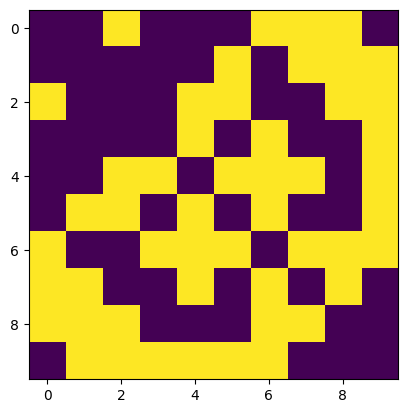

In [23]:
G = nx.erdos_renyi_graph(n=10,p=0.5)

A = nx.adjacency_matrix(G).todense()

plt.imshow(A)

/var/folders/0c/0z7vdgm924n7cfct5sbdp4nc0000gr/T/ipykernel_10340/4078562891.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G).todense()


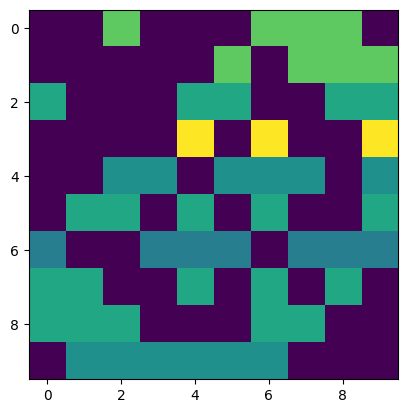

In [24]:
P = RW_transition_mx(G)

plt.imshow(P)

In [25]:
def RW_MC(G, k=1, dist=None): 
    ### Random walk on G by using Markov transition matrix
    P = RW_transition_mx(G)
    if dist is None:
        ## choose a uniformly random node and set dist to be the point mass at that node
        v_index = np.arange(len(G.nodes()))
        x = np.random.choice(v_index)
        dist = [0]*len(v_index)
        dist[x] = 1
    
    dist = np.asarray(dist)
    for i in np.arange(k):
        dist = dist @ P
    return dist 
    

In [26]:
G = nx.erdos_renyi_graph(n=10,p=0.3)

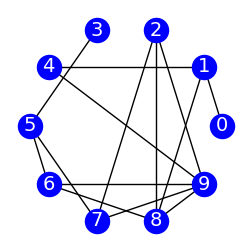

In [27]:
# plot the graph 
fig = plt.figure(figsize=[3,3], constrained_layout=False)
ax = fig.add_subplot()
nx.draw_networkx(G, ax=ax, pos=nx.circular_layout(G), labels={i: i for i in range(10)},
                 node_size=300, node_color="blue", font_size=14, font_color="white")
plt.axis('off');

In [28]:
## choose a uniformly random node and set dist to be the point mass at that node
v_index = np.arange(len(G.nodes()))
x = np.random.choice(v_index)
dist = [0]*len(v_index)
dist[x] = 1


In [29]:
dist

[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]

In [30]:
RW_MC(G, k=100, dist=dist)

/var/folders/0c/0z7vdgm924n7cfct5sbdp4nc0000gr/T/ipykernel_10340/4078562891.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G).todense()


array([0.03571429, 0.10714286, 0.10714286, 0.03571429, 0.07142857,
       0.10714286, 0.10714286, 0.10714286, 0.14285714, 0.17857143])

In [31]:
RW_MC(G, k=101, dist=dist)

/var/folders/0c/0z7vdgm924n7cfct5sbdp4nc0000gr/T/ipykernel_10340/4078562891.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G).todense()


array([0.03571429, 0.10714286, 0.10714286, 0.03571429, 0.07142857,
       0.10714286, 0.10714286, 0.10714286, 0.14285714, 0.17857143])

Number of nodes: 769
Number of edges: 16656
edge density: 0.05640442132639792
Avg. clustering coefficient: 0.4091173048334611
Avg. shortest path length: 2.3378480449470755
Number of nodes: 92
Number of edges: 573


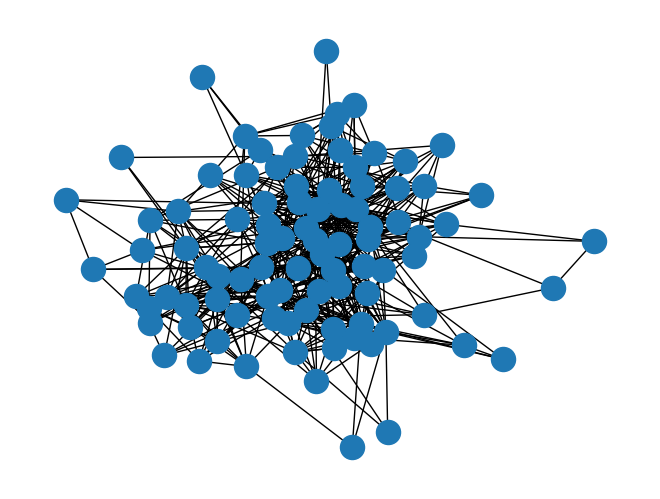

In [32]:
## Load Caltech Facebook graph

# Initialize graph 
G = nx.Graph()

# Load Caltech.txt edgelist
path = "../Data/Caltech36.txt"
edgelist = list(np.genfromtxt(path, delimiter=",", dtype=str)) 

# Add in all edges in the edgelist to G
for e in edgelist:
    G.add_edge(e[0], e[1]) 
    
# Print out the number of nodes and edges in G

print("Number of nodes:", len(list(G.nodes())))
print("Number of edges:", len(list(G.edges())))
print("edge density:", nx.density(G))
G0 = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
print("Avg. clustering coefficient:", nx.average_clustering(G0))
print("Avg. shortest path length:", nx.average_shortest_path_length(G0))


# Perform a random walk and take an induced subgraph on a random walk trajectory 
RW_trajectory = RW(G0, steps=100, return_history=True)
H = G.subgraph(nodes=RW_trajectory)
print("Number of nodes:", len(list(H.nodes())))
print("Number of edges:", len(list(H.edges())))
nx.draw(H)

/var/folders/0c/0z7vdgm924n7cfct5sbdp4nc0000gr/T/ipykernel_10340/4078562891.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G).todense()


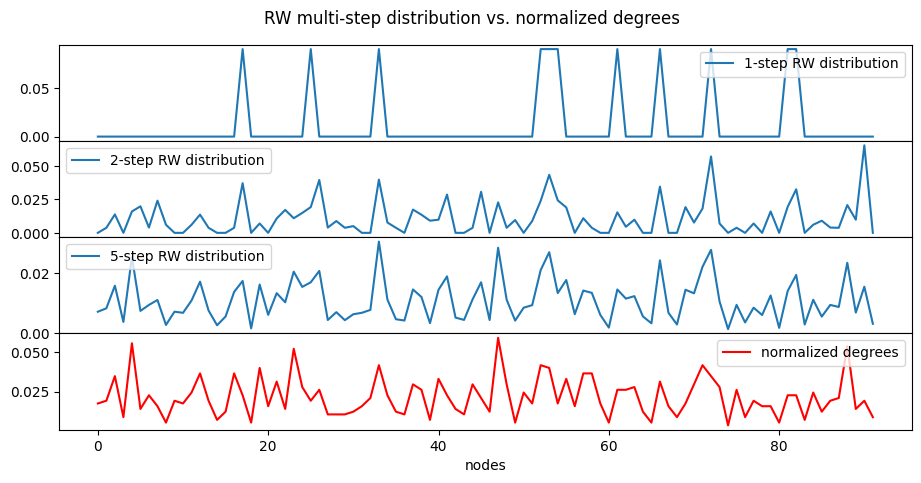

In [34]:
fig = plt.figure(figsize=[11,5], constrained_layout=False)
network_list = [""]
n_samples_display = 3
k_list = [1, 2, 5]

outer_grid = gridspec.GridSpec(nrows=len(k_list)+1, ncols=1, wspace=0.5, hspace=0)

## choose a uniformly random node and set dist to be the point mass at that node
v_index = np.arange(len(H.nodes()))
x = np.random.choice(v_index)
dist = [0]*len(v_index)
dist[x] = 1

    
for i in np.arange(len(k_list)+1):
    if i < len(k_list):
        inner_grid = outer_grid[i,0].subgridspec(1, 1, wspace=0, hspace=0)

        k = k_list[i]
        a = RW_MC(H, k=k, dist=dist)
        ax = fig.add_subplot(inner_grid[0, 0])
        ax.plot(a, label='{}-step RW distribution'.format(k))
        ax.legend()
        #ax.set_xlabel("nodes")
        ax.set_xticks([])
        #ax.set_title("RW empirical distribution", fontsize=8)
        
        
    else: 
        b = [H.degree(n) for n in H.nodes()]
        b = np.asarray(b)/len(list(H.edges()))

        inner_grid = outer_grid[-1,0].subgridspec(1, 1, wspace=0, hspace=0)
        ax = fig.add_subplot(inner_grid[0, 0])
        #ax.hist(emp_dist_list, bins='auto', alpha=0.7, label='proportion of time spent' + "\n ({} samples)".format(k) , edgecolor="k", 
        #        histtype='stepfilled', density=False, linewidth=1)
        ax.plot(b, label='normalized degrees', color='r')
        #ax.plot(b, label='degree/2|E|')
        ax.legend()
        ax.set_xlabel("nodes")
        #ax.set_title("Normalized degrees", fontsize=8)

plt.suptitle("RW multi-step distribution vs. normalized degrees", y=0.95)       
plt.savefig("RW_multi_step_dist1", bbox_inches ="tight")

/var/folders/0c/0z7vdgm924n7cfct5sbdp4nc0000gr/T/ipykernel_10340/4078562891.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G).todense()


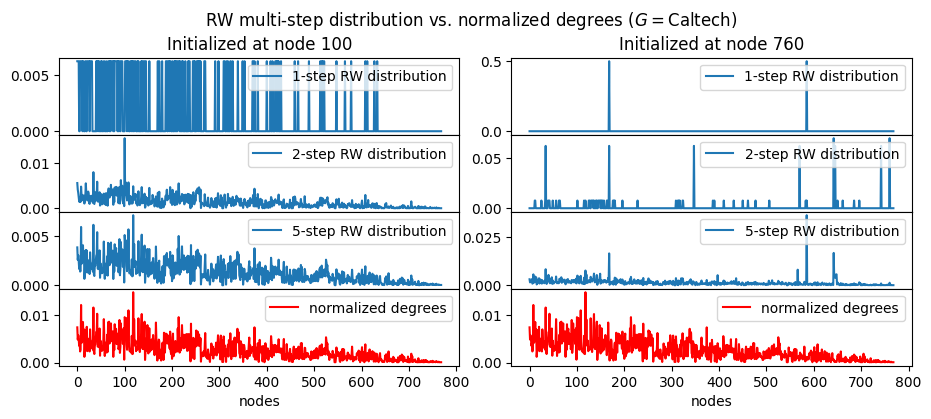

In [40]:
## load Caltech graph
G = nx.Graph()
k_list = [1,2,5]

# Load Caltech.txt edgelist
path = "../Data/Caltech36.txt"
edgelist = list(np.genfromtxt(path, delimiter=",", dtype=str)) 

# Add in all edges in the edgelist to G
for e in edgelist:
    G.add_edge(e[0], e[1]) 
    
## Creat figure 
fig = plt.figure(figsize=[11,4], constrained_layout=False)
network_list = [""]
n_samples_display = 3
initial_nodes = [100, 760]
k_list = [1, 2, 5]
ymax = 0.03

outer_grid = gridspec.GridSpec(nrows=len(k_list)+1, ncols=2, wspace=0.13, hspace=0)
    
for j in np.arange(2):
    #n = n_list[j]
    #G = nx.cycle_graph(n=n)
    
    ## choose a uniformly random node and set dist to be the point mass at that node
    v_index = np.arange(len(G.nodes()))
    #x = np.random.choice(v_index)
    x = initial_nodes[j]
    dist = [0]*len(v_index)
    dist[x] = 1

    for i in np.arange(len(k_list)+1):
        if i < len(k_list):
            inner_grid = outer_grid[i,j].subgridspec(1, 1, wspace=0, hspace=0)

            k = k_list[i]
            a = RW_MC(G, k=k, dist=dist)
            ax = fig.add_subplot(inner_grid[0, 0])
            ax.plot(a, label='{}-step RW distribution'.format(k))
            ax.legend(loc='upper right')
            #ax.set_xlabel("nodes")
            ax.set_xticks([])
            #ax.set_title("RW empirical distribution", fontsize=8)
            #ax.set_ylim(0, ymax)
            
            if i == 0:
                ax.set_title("Initialized at node {}".format(x))

        else: 
            b = [G.degree(n) for n in G.nodes()]
            b = np.asarray(b)/len(list(G.edges()))

            inner_grid = outer_grid[-1,j].subgridspec(1, 1, wspace=0, hspace=0)
            ax = fig.add_subplot(inner_grid[0, 0])
            #ax.hist(emp_dist_list, bins='auto', alpha=0.7, label='proportion of time spent' + "\n ({} samples)".format(k) , edgecolor="k", 
            #        histtype='stepfilled', density=False, linewidth=1)
            ax.plot(b, label='normalized degrees', color='r')
            #ax.plot(b, label='degree/2|E|')
            ax.legend()
            ax.set_xlabel("nodes")
            #ax.set_title("Normalized degrees", fontsize=8)
            #ax.set_ylim(0, ymax)

plt.suptitle(r"RW multi-step distribution vs. normalized degrees ($G=$Caltech)".format(n), y=1)       
plt.savefig("RW_multi_step_dist_Caltech".format(n), bbox_inches ="tight")

In [41]:
n = 19
G = nx.cycle_graph(n=n)

In [42]:
A = nx.adjacency_matrix(G).todense()

/var/folders/0c/0z7vdgm924n7cfct5sbdp4nc0000gr/T/ipykernel_10340/2684795532.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G).todense()


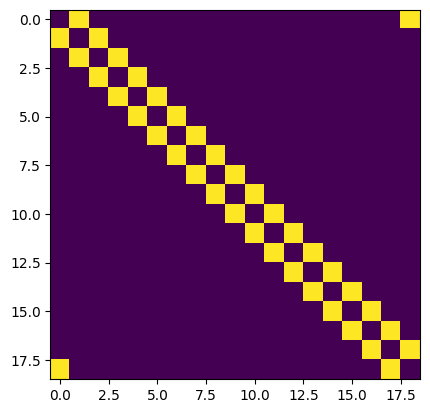

In [43]:
plt.imshow(A)

In [44]:
v_index = np.arange(len(G.nodes()))
#x = np.random.choice(v_index)
x = n // 2
dist = [0]*len(v_index)
dist[x] = 1

In [45]:
RW_MC(G, k=1000, dist=dist)

/var/folders/0c/0z7vdgm924n7cfct5sbdp4nc0000gr/T/ipykernel_10340/4078562891.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G).todense()


array([0.05263157, 0.05263161, 0.05263153, 0.05263164, 0.0526315 ,
       0.05263167, 0.05263148, 0.05263169, 0.05263147, 0.05263169,
       0.05263147, 0.05263169, 0.05263148, 0.05263167, 0.0526315 ,
       0.05263164, 0.05263153, 0.05263161, 0.05263157])

/var/folders/0c/0z7vdgm924n7cfct5sbdp4nc0000gr/T/ipykernel_10340/4078562891.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G).todense()


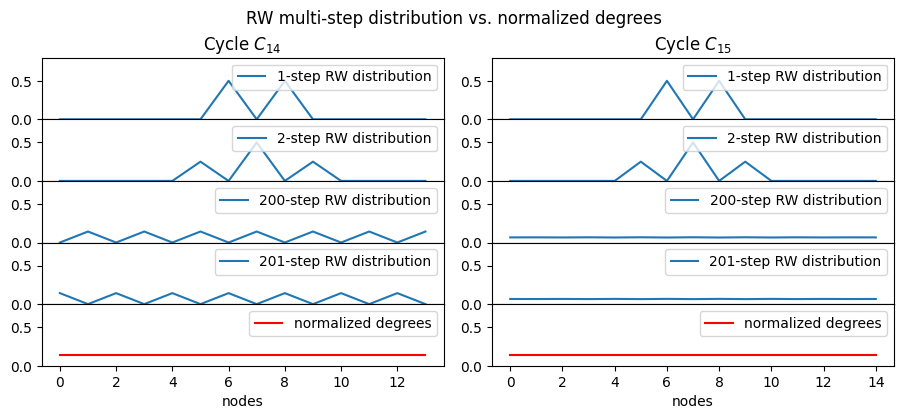

In [46]:
### Cycle graph
fig = plt.figure(figsize=[11,4], constrained_layout=False)
network_list = [""]
n_samples_display = 3
n_list = [14, 15]
k_list = [1, 2, 200, 201]

outer_grid = gridspec.GridSpec(nrows=len(k_list)+1, ncols=2, wspace=0.12, hspace=0)
    
for j in np.arange(2):
    n = n_list[j]
    G = nx.cycle_graph(n=n)
    
    ## choose a uniformly random node and set dist to be the point mass at that node
    v_index = np.arange(len(G.nodes()))
    #x = np.random.choice(v_index)
    x = n // 2
    dist = [0]*len(v_index)
    dist[x] = 1

    for i in np.arange(len(k_list)+1):
        if i < len(k_list):
            inner_grid = outer_grid[i,j].subgridspec(1, 1, wspace=0, hspace=0)

            k = k_list[i]
            a = RW_MC(G, k=k, dist=dist)
            ax = fig.add_subplot(inner_grid[0, 0])
            ax.plot(a, label='{}-step RW distribution'.format(k))
            ax.legend(loc='upper right')
            #ax.set_xlabel("nodes")
            ax.set_xticks([])
            #ax.set_title("RW empirical distribution", fontsize=8)
            ax.set_ylim(0,0.8)
            
            if i == 0:
                ax.set_title("Cycle $C_{{{}}}$".format(n))

        else: 
            b = [G.degree(n) for n in G.nodes()]
            b = np.asarray(b)/len(list(G.edges()))

            inner_grid = outer_grid[-1,j].subgridspec(1, 1, wspace=0, hspace=0)
            ax = fig.add_subplot(inner_grid[0, 0])
            #ax.hist(emp_dist_list, bins='auto', alpha=0.7, label='proportion of time spent' + "\n ({} samples)".format(k) , edgecolor="k", 
            #        histtype='stepfilled', density=False, linewidth=1)
            ax.plot(b, label='normalized degrees', color='r')
            #ax.plot(b, label='degree/2|E|')
            ax.legend()
            ax.set_xlabel("nodes")
            #ax.set_title("Normalized degrees", fontsize=8)
            ax.set_ylim(0,0.8)

plt.suptitle(r"RW multi-step distribution vs. normalized degrees".format(n), y=1)       
plt.savefig("RW_multi_step_dist_cycle_{}".format(n), bbox_inches ="tight")

# Metropolis-Hastings correction of RW on Graphs

## Empirical distribution

In [47]:
def RW(G, x0=None, steps=1, return_history=False, use_MH=False):
    ### simple symmetric random walk on graph G 
    ### initialization at x0
    ### If use_MH, then use Metropolis-Hastings rule so that 
    ### the unifrom distribution becomes the stationary distribution 
    if x0 is None:
        x = np.random.choice(G.nodes())
    else:
        x = x0
    
    history = []
    for i in np.arange(steps):
        if len(list(G.neighbors(x))) == 1:
            print("RW is stuck at isolated node")
            x = np.random.choice(G.nodes()) # re-initialize uniformly at random
        else: 
            x1 = np.random.choice(list(G.neighbors(x)))
            if use_MH:
                U = np.random.rand()
                if U < G.degree(x)/G.degree(x1): 
                    x = x1
            else: 
                x = x1

        if return_history:
            history.append(x)
        
    if not return_history: 
        return x 
    else: 
        return history

In [48]:
def emp_dist_RW(G, k=100, use_MH=False):
    RW_trajectory = RW(G, steps=k, return_history=True, use_MH=use_MH)
    nodes=list(G.nodes())

    emp_dist = {}
    for v in nodes: 
        emp_dist.update({v:0})
        
    
    for v in RW_trajectory: 
        j = emp_dist.get(v)
        emp_dist.update({v: j+1})

    emp_dist_list = [emp_dist.get(v) for v in nodes]
    
    return emp_dist, emp_dist_list

RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at

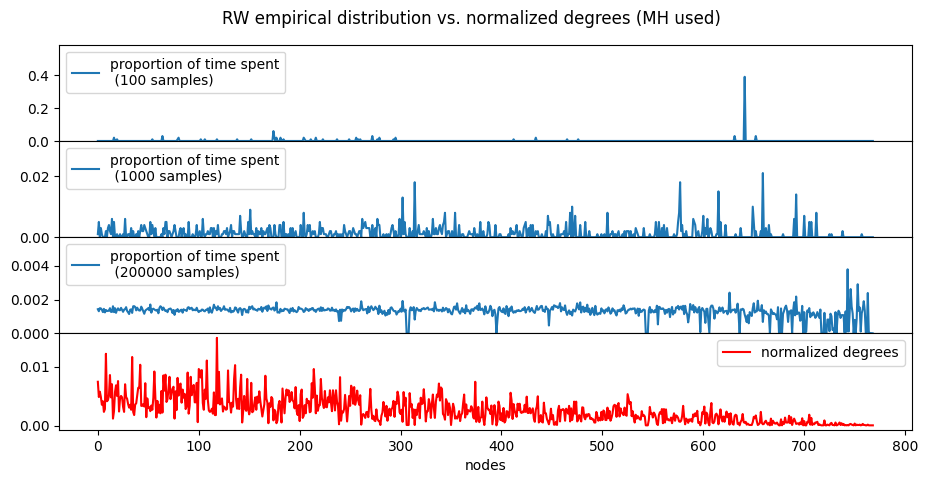

In [50]:
## load Caltech graph
G = nx.Graph()

# Load Caltech.txt edgelist
path = "../Data/Caltech36.txt"
edgelist = list(np.genfromtxt(path, delimiter=",", dtype=str)) 

# Add in all edges in the edgelist to G
for e in edgelist:
    G.add_edge(e[0], e[1]) 


fig = plt.figure(figsize=[11,5], constrained_layout=False)
network_list = [""]
n_samples_display = 3
k_list = [100, 1000, 200000]
use_MH = True
y_max = 0.005

outer_grid = gridspec.GridSpec(nrows=len(k_list)+1, ncols=1, wspace=0.5, hspace=0)

    
    
for i in np.arange(len(k_list)+1):
    if i < len(k_list):
        inner_grid = outer_grid[i,0].subgridspec(1, 1, wspace=0, hspace=0)

        k = k_list[i]
        emp_dist, a = emp_dist_RW(G, k=k, use_MH=use_MH)
        ax = fig.add_subplot(inner_grid[0, 0])
        ax.plot(np.asarray(a)/k, label='proportion of time spent' + "\n ({} samples)".format(k))
        ax.legend()
        #ax.set_xlabel("nodes")
        ax.set_xticks([])
        ax.set_ylim(0, 1.5*np.max(np.asarray(a)/k))
        #ax.set_title("RW empirical distribution", fontsize=8)
        
        
    else: 
        b = [G.degree(n) for n in G.nodes()]
        b = np.asarray(b)/len(list(G.edges()))

        inner_grid = outer_grid[-1,0].subgridspec(1, 1, wspace=0, hspace=0)
        ax = fig.add_subplot(inner_grid[0, 0])
        #ax.hist(emp_dist_list, bins='auto', alpha=0.7, label='proportion of time spent' + "\n ({} samples)".format(k) , edgecolor="k", 
        #        histtype='stepfilled', density=False, linewidth=1)
        ax.plot(b, label='normalized degrees', color='r')
        #ax.plot(b, label='degree/2|E|')
        ax.legend()
        ax.set_xlabel("nodes")
        #ax.set_title("Normalized degrees", fontsize=8)

plt.suptitle("RW empirical distribution vs. normalized degrees (MH used)", y=0.95)       
plt.savefig("RW_empirical_dist_MH", bbox_inches ="tight")

## Multi-step distribution

In [143]:
def RW_transition_mx(G, use_MH=False): 
    from tqdm import trange
    ### Compute random walk transition matrix of a graph G 
    A = nx.adjacency_matrix(G).todense()
    P = np.zeros(shape=A.shape)
    nodes = list(G.nodes())
    for i in np.arange(A.shape[0]): ## normalize rows of A by degree 
        if G.degree(nodes[i])>0:
            P[i,:] = A[i,:]/G.degree(nodes[i])
            
    if use_MH:
        E = nx.adjacency_matrix(G).nonzero() ## Nonzero entries of the sparse form of the adjacency matrix 
        for k in np.arange(len(E[0])): ## A for loop on the edges, rather than pairs of nodes. 
            i = E[0][k]
            j = E[1][k]
            if G.degree(nodes[j])>G.degree(nodes[i]):
                P[i,j] = P[i,j]*(G.degree(nodes[i])/G.degree(nodes[j]))
        
        for i in np.arange(A.shape[1]): ## Add in rejection probabilities on the diagonal 
            P[i,i] = 1 - np.sum(P[i,:])
    return P

In [144]:
def RW_MC(G, k=1, dist=None, use_MH=False): 
    ### Random walk on G by using Markov transition matrix
    P = RW_transition_mx(G, use_MH=use_MH)
    
    if dist is None:
        ## choose a uniformly random node and set dist to be the point mass at that node
        v_index = np.arange(len(G.nodes()))
        x = np.random.choice(v_index)
        dist = [0]*len(v_index)
        dist[x] = 1
    
    dist = np.asarray(dist)
    for i in np.arange(k):
        dist = dist @ P
    return dist 
    

/var/folders/0c/0z7vdgm924n7cfct5sbdp4nc0000gr/T/ipykernel_10340/416925230.py:2: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G).todense()


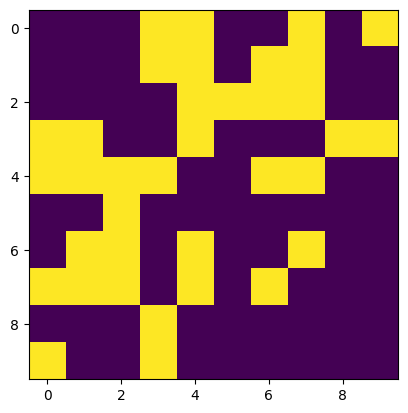

In [145]:
G = nx.erdos_renyi_graph(n=10,p=0.5)
A = nx.adjacency_matrix(G).todense()
plt.imshow(A)

/var/folders/0c/0z7vdgm924n7cfct5sbdp4nc0000gr/T/ipykernel_10340/2365703401.py:4: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G).todense()


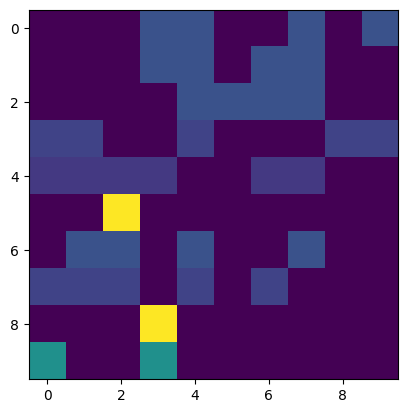

In [146]:
P = RW_transition_mx(G, use_MH=False)
plt.imshow(P)

/var/folders/0c/0z7vdgm924n7cfct5sbdp4nc0000gr/T/ipykernel_10340/2365703401.py:4: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G).todense()
/var/folders/0c/0z7vdgm924n7cfct5sbdp4nc0000gr/T/ipykernel_10340/2365703401.py:16: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  E = nx.adjacency_matrix(G).nonzero()


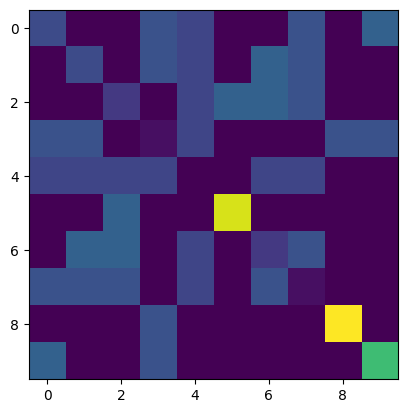

In [147]:
P = RW_transition_mx(G, use_MH=True)
plt.imshow(P)

/var/folders/0c/0z7vdgm924n7cfct5sbdp4nc0000gr/T/ipykernel_10340/3038123655.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G).todense()


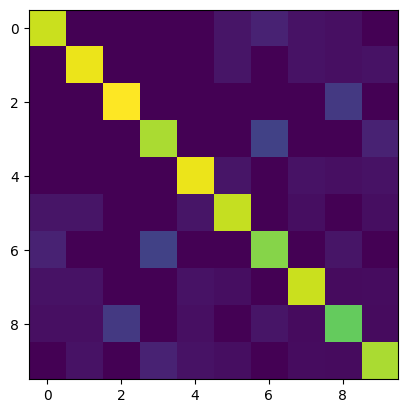

In [107]:
P = RW_transition_mx(G, use_MH=True)
plt.imshow(P)

/var/folders/0c/0z7vdgm924n7cfct5sbdp4nc0000gr/T/ipykernel_10340/2365703401.py:4: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G).todense()
/var/folders/0c/0z7vdgm924n7cfct5sbdp4nc0000gr/T/ipykernel_10340/2365703401.py:16: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  E = nx.adjacency_matrix(G).nonzero()


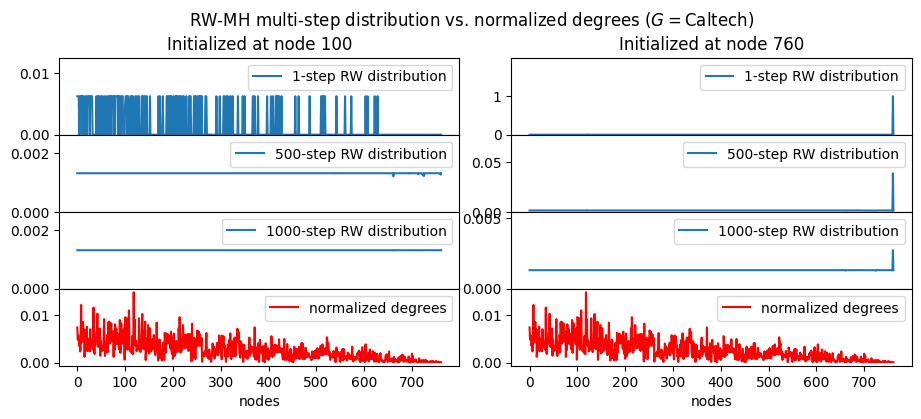

In [148]:
## load Caltech graph
G = nx.Graph()
k_list = [1,2,5]

# Load Caltech.txt edgelist
path = "../Data/Caltech36.txt"
edgelist = list(np.genfromtxt(path, delimiter=",", dtype=str)) 

# Add in all edges in the edgelist to G
for e in edgelist:
    G.add_edge(e[0], e[1]) 

# Take the largest connected compoment 
G = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
    
## Creat figure 
fig = plt.figure(figsize=[11,4], constrained_layout=False)
network_list = [""]
n_samples_display = 3
initial_nodes = [100, 760]
k_list = [1, 500, 1000]
ymax = 0.03

outer_grid = gridspec.GridSpec(nrows=len(k_list)+1, ncols=2, wspace=0.13, hspace=0)
    
for j in np.arange(2):
    #n = n_list[j]
    #G = nx.cycle_graph(n=n)
    
    ## choose a uniformly random node and set dist to be the point mass at that node
    v_index = np.arange(len(G.nodes()))
    #x = np.random.choice(v_index)
    x = initial_nodes[j]
    dist = [0]*len(v_index)
    dist[x] = 1

    for i in np.arange(len(k_list)+1):
        if i < len(k_list):
            inner_grid = outer_grid[i,j].subgridspec(1, 1, wspace=0, hspace=0)

            k = k_list[i]
            a = RW_MC(G, k=k, dist=dist, use_MH=True)
            ax = fig.add_subplot(inner_grid[0, 0])
            ax.plot(a, label='{}-step RW distribution'.format(k))
            ax.legend(loc='upper right')
            #ax.set_xlabel("nodes")
            ax.set_xticks([])
            #ax.set_title("RW empirical distribution", fontsize=8)
            ax.set_ylim(0, 2*np.max(a))
            
            if i == 0:
                ax.set_title("Initialized at node {}".format(x))

        else: 
            b = [G.degree(n) for n in G.nodes()]
            b = np.asarray(b)/len(list(G.edges()))

            inner_grid = outer_grid[-1,j].subgridspec(1, 1, wspace=0, hspace=0)
            ax = fig.add_subplot(inner_grid[0, 0])
            #ax.hist(emp_dist_list, bins='auto', alpha=0.7, label='proportion of time spent' + "\n ({} samples)".format(k) , edgecolor="k", 
            #        histtype='stepfilled', density=False, linewidth=1)
            ax.plot(b, label='normalized degrees', color='r')
            #ax.plot(b, label='degree/2|E|')
            ax.legend()
            ax.set_xlabel("nodes")
            #ax.set_title("Normalized degrees", fontsize=8)
            #ax.set_ylim(0, ymax)

plt.suptitle(r"RW-MH multi-step distribution vs. normalized degrees ($G=$Caltech)".format(n), y=1)       
plt.savefig("RW_multi_step_dist_Caltech_MH".format(n), bbox_inches ="tight")

# PageRank

## Empirical distribution

In [181]:
def PR(G, x0=None, steps=1, return_history=False, alpha=0):
    from tqdm import trange
    # PageRank on digraph G 
    # initialization at x0
    # alpha = PageRank parameter; probability of making RW move; 1-alpha is the probability of teleportation. 
    if x0 is None:
        x = np.random.choice(G.nodes())
    else:
        x = x0
    
    history = []
    for i in trange(steps):
        U = np.random.rand()
        if U>alpha:
            x = np.random.choice(G.nodes()) # re-initialize uniformly at random
        elif (len(list(G.neighbors(x))) == 0):
            #print("RW is stuck at isolated")
            x = x
        else: 
            x = np.random.choice(list(G.neighbors(x))) # DiGraph.neighbors gives out-neighbors 

        if return_history:
            history.append(x)
        
    if not return_history: 
        return x 
    else: 
        return history

In [79]:
PR(G, steps=100, return_history=True, alpha=0.9)

RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node


['534',
 '265',
 '313',
 '584',
 '515',
 '768',
 '484',
 '114',
 '572',
 '593',
 '116',
 '47',
 '638',
 '623',
 '156',
 '578',
 '623',
 '1',
 '615',
 '433',
 '95',
 '90',
 '249',
 '567',
 '252',
 '596',
 '312',
 '735',
 '575',
 '735',
 '22',
 '730',
 '415',
 '726',
 '220',
 '459',
 '540',
 '387',
 '223',
 '412',
 '393',
 '487',
 '146',
 '602',
 '165',
 '641',
 '90',
 '675',
 '355',
 '248',
 '676',
 '436',
 '184',
 '211',
 '69',
 '352',
 '589',
 '767',
 '211',
 '756',
 '257',
 '452',
 '557',
 '389',
 '259',
 '576',
 '338',
 '651',
 '200',
 '756',
 '443',
 '226',
 '609',
 '93',
 '242',
 '20',
 '424',
 '601',
 '459',
 '601',
 '38',
 '687',
 '390',
 '677',
 '433',
 '765',
 '308',
 '275',
 '459',
 '695',
 '630',
 '578',
 '67',
 '265',
 '455',
 '752',
 '120',
 '343',
 '12',
 '385']

In [80]:
def emp_dist_PR(G, k=100, alpha=1):
    PR_trajectory = PR(G, steps=k, return_history=True, alpha=alpha)
    nodes=list(G.nodes())

    emp_dist = {}
    for v in nodes: 
        emp_dist.update({v:0})
        
    
    for v in PR_trajectory: 
        j = emp_dist.get(v)
        emp_dist.update({v: j+1})

    emp_dist_list = [emp_dist.get(v) for v in nodes]
    
    return emp_dist, emp_dist_list

RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at

RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at

RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at

RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at

RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at

RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at

RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at isolated node
RW is stuck at

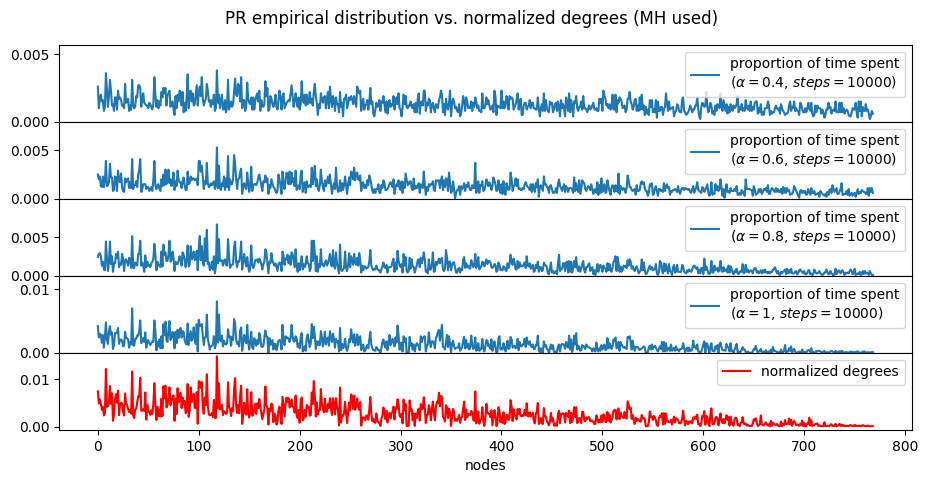

In [90]:
## load Caltech graph
G = nx.Graph()

# Load Caltech.txt edgelist
path = "../Data/Caltech36.txt"
edgelist = list(np.genfromtxt(path, delimiter=",", dtype=str)) 

# Add in all edges in the edgelist to G
for e in edgelist:
    G.add_edge(e[0], e[1]) 


fig = plt.figure(figsize=[11,5], constrained_layout=False)
network_list = [""]
k = 10000
alpha_list = [0.4, 0.6, 0.8, 1]
y_max = 0.005

outer_grid = gridspec.GridSpec(nrows=len(alpha_list)+1, ncols=1, wspace=0.5, hspace=0)

    
    
for i in np.arange(len(alpha_list)+1):
    if i < len(alpha_list):
        inner_grid = outer_grid[i,0].subgridspec(1, 1, wspace=0, hspace=0)

        alpha = alpha_list[i]
        emp_dist, a = emp_dist_PR(G, k=k, alpha=alpha)
        ax = fig.add_subplot(inner_grid[0, 0])
        ax.plot(np.asarray(a)/k, label='proportion of time spent' + "\n" + r"($\alpha=${}, $steps=${})".format(alpha,k))
        ax.legend()
        #ax.set_xlabel("nodes")
        ax.set_xticks([])
        ax.set_ylim(0, 1.5*np.max(np.asarray(a)/k))
        #ax.set_title("RW empirical distribution", fontsize=8)
        
        
    else: 
        b = [G.degree(n) for n in G.nodes()]
        b = np.asarray(b)/len(list(G.edges()))

        inner_grid = outer_grid[-1,0].subgridspec(1, 1, wspace=0, hspace=0)
        ax = fig.add_subplot(inner_grid[0, 0])
        #ax.hist(emp_dist_list, bins='auto', alpha=0.7, label='proportion of time spent' + "\n ({} samples)".format(k) , edgecolor="k", 
        #        histtype='stepfilled', density=False, linewidth=1)
        ax.plot(b, label='normalized degrees', color='r')
        #ax.plot(b, label='degree/2|E|')
        ax.legend()
        ax.set_xlabel("nodes")
        #ax.set_title("Normalized degrees", fontsize=8)

plt.suptitle("PR empirical distribution vs. normalized degrees (MH used)", y=0.95)       
plt.savefig("PR_empirical_dist", bbox_inches ="tight")

## Multi-step distribution

In [153]:
def PR_transition_mx(G, alpha=0.8): 
    from tqdm import trange
    ### Compute random walk transition matrix of a graph G 
    A = nx.adjacency_matrix(G).todense()
    P = np.zeros(shape=A.shape)
    nodes = list(G.nodes())
    for i in np.arange(A.shape[0]): ## normalize rows of A by degree 
        if G.degree(nodes[i])>0:
            P[i,:] = A[i,:]/G.degree(nodes[i])
            
    Q = alpha * P + (1-alpha) * np.ones(shape=A.shape)
    return P    

In [154]:
def PR_MC(G, k=1, dist=None, alpha=0.8): 
    ### Random walk on G by using Markov transition matrix
    P = PR_transition_mx(G, alpha=alpha)
    
    if dist is None:
        ## choose a uniformly random node and set dist to be the point mass at that node
        v_index = np.arange(len(G.nodes()))
        x = np.random.choice(v_index)
        dist = [0]*len(v_index)
        dist[x] = 1
    
    dist = np.asarray(dist)
    for i in np.arange(k):
        dist = dist @ P
    return dist 

/var/folders/0c/0z7vdgm924n7cfct5sbdp4nc0000gr/T/ipykernel_10340/2360219994.py:4: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G).todense()


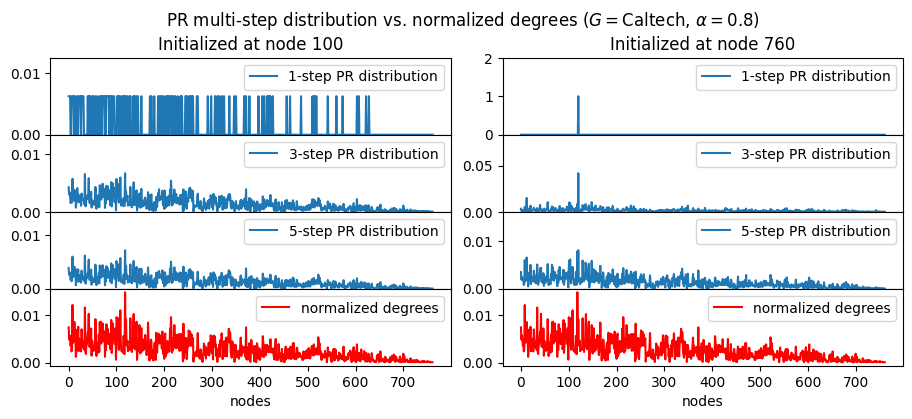

In [158]:
## load Caltech graph
G = nx.Graph()
k_list = [1,2,5]

# Load Caltech.txt edgelist
path = "../Data/Caltech36.txt"
edgelist = list(np.genfromtxt(path, delimiter=",", dtype=str)) 

# Add in all edges in the edgelist to G
for e in edgelist:
    G.add_edge(e[0], e[1]) 

# Take the largest connected compoment 
G = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
    
## Creat figure 
fig = plt.figure(figsize=[11,4], constrained_layout=False)
network_list = [""]
n_samples_display = 3
initial_nodes = [100, 760]
k_list = [1, 3, 5]
ymax = 0.03
alpha = 0.8

outer_grid = gridspec.GridSpec(nrows=len(k_list)+1, ncols=2, wspace=0.13, hspace=0)
    
for j in np.arange(2):
    #n = n_list[j]
    #G = nx.cycle_graph(n=n)
    
    ## choose a uniformly random node and set dist to be the point mass at that node
    v_index = np.arange(len(G.nodes()))
    #x = np.random.choice(v_index)
    x = initial_nodes[j]
    dist = [0]*len(v_index)
    dist[x] = 1

    for i in np.arange(len(k_list)+1):
        if i < len(k_list):
            inner_grid = outer_grid[i,j].subgridspec(1, 1, wspace=0, hspace=0)

            k = k_list[i]
            a = PR_MC(G, k=k, dist=dist, alpha=alpha)
            ax = fig.add_subplot(inner_grid[0, 0])
            ax.plot(a, label='{}-step PR distribution'.format(k))
            ax.legend(loc='upper right')
            #ax.set_xlabel("nodes")
            ax.set_xticks([])
            #ax.set_title("RW empirical distribution", fontsize=8)
            ax.set_ylim(0, 2*np.max(a))
            
            if i == 0:
                ax.set_title("Initialized at node {}".format(x))

        else: 
            b = [G.degree(n) for n in G.nodes()]
            b = np.asarray(b)/len(list(G.edges()))

            inner_grid = outer_grid[-1,j].subgridspec(1, 1, wspace=0, hspace=0)
            ax = fig.add_subplot(inner_grid[0, 0])
            #ax.hist(emp_dist_list, bins='auto', alpha=0.7, label='proportion of time spent' + "\n ({} samples)".format(k) , edgecolor="k", 
            #        histtype='stepfilled', density=False, linewidth=1)
            ax.plot(b, label='normalized degrees', color='r')
            #ax.plot(b, label='degree/2|E|')
            ax.legend()
            ax.set_xlabel("nodes")
            #ax.set_title("Normalized degrees", fontsize=8)
            #ax.set_ylim(0, ymax)

plt.suptitle(r"PR multi-step distribution vs. normalized degrees ($G=$Caltech, $\alpha=${})".format(alpha), y=1)       
plt.savefig("PR_multi_step_dist_Caltech".format(n), bbox_inches ="tight")

In [162]:

# Load Caltech.txt edgelist
path = "../Data/rt_justinbieber.txt"
edgelist = list(np.genfromtxt(path, delimiter=",", dtype=str)) 


In [163]:
edgelist

[array(['722', '746', '1347023341'], dtype='<U10'),
 array(['722', '2851', '1346958333'], dtype='<U10'),
 array(['722', '8371', '1346969603'], dtype='<U10'),
 array(['722', '8297', '1346935897'], dtype='<U10'),
 array(['722', '3933', '1346954937'], dtype='<U10'),
 array(['722', '9166', '1346926765'], dtype='<U10'),
 array(['722', '6548', '1346972881'], dtype='<U10'),
 array(['722', '4209', '1346952596'], dtype='<U10'),
 array(['722', '8219', '1346971383'], dtype='<U10'),
 array(['722', '8603', '1347027889'], dtype='<U10'),
 array(['722', '2560', '1346961097'], dtype='<U10'),
 array(['722', '2512', '1347024780'], dtype='<U10'),
 array(['722', '1018', '1346977404'], dtype='<U10'),
 array(['722', '3488', '1346938220'], dtype='<U10'),
 array(['722', '7374', '1346950567'], dtype='<U10'),
 array(['722', '6635', '1346948320'], dtype='<U10'),
 array(['722', '8131', '1346922080'], dtype='<U10'),
 array(['722', '7961', '1346970597'], dtype='<U10'),
 array(['722', '2206', '1346937315'], dtype='<U

## PageRank on RETWEET network 

In [168]:
# load RETWEET Network edges (on tweets about Justin Bieber)
# source: https://networkrepository.com/rt.php


# Load rt_justinbieber.txt edgelist
path = "../Data/rt_justinbieber.txt"
edgelist = list(np.genfromtxt(path, delimiter=",", dtype=str)) 

## load Caltech graph
G = nx.DiGraph()

# Add in all edges in the edgelist to G
for e in edgelist:
    G.add_edge(e[0], e[1]) 

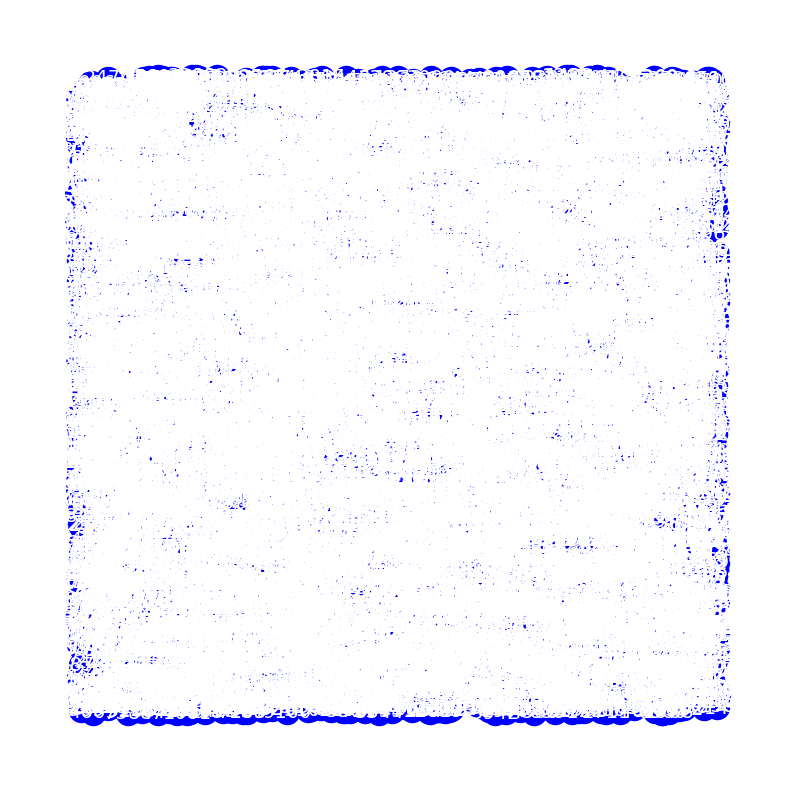

In [172]:
# plot the graph 
fig = plt.figure(figsize=[10,10], constrained_layout=False)
ax = fig.add_subplot()
nx.draw_networkx(G, ax=ax, pos=nx.random_layout(G),
                 node_size=300, node_color="blue", font_size=14, font_color="white")
plt.axis('off');

100%|████████████████████████████████| 10000/10000 [00:00<00:00, 1626077.38it/s]


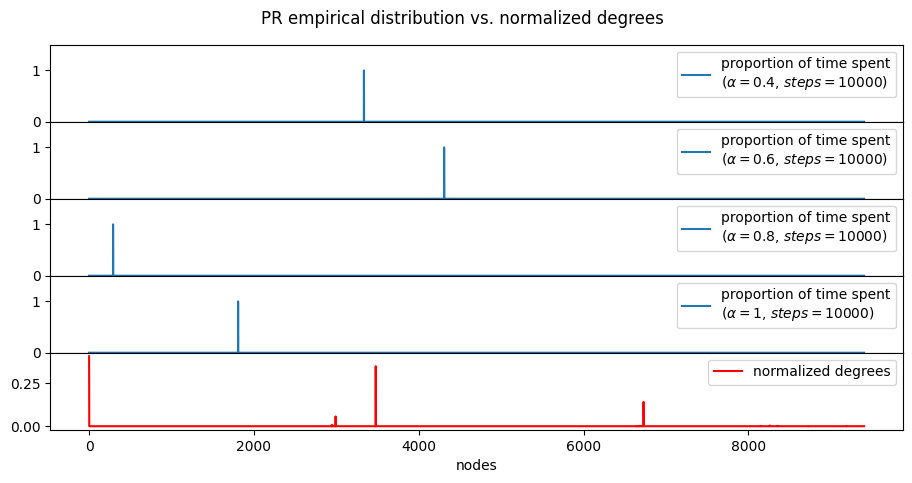

In [182]:
fig = plt.figure(figsize=[11,5], constrained_layout=False)
network_list = [""]
k = 10000
alpha_list = [0.4, 0.6, 0.8, 1]
y_max = 0.005

outer_grid = gridspec.GridSpec(nrows=len(alpha_list)+1, ncols=1, wspace=0.5, hspace=0)

    
    
for i in np.arange(len(alpha_list)+1):
    if i < len(alpha_list):
        inner_grid = outer_grid[i,0].subgridspec(1, 1, wspace=0, hspace=0)

        alpha = alpha_list[i]
        emp_dist, a = emp_dist_PR(G, k=k, alpha=alpha)
        ax = fig.add_subplot(inner_grid[0, 0])
        ax.plot(np.asarray(a)/k, label='proportion of time spent' + "\n" + r"($\alpha=${}, $steps=${})".format(alpha,k))
        ax.legend()
        #ax.set_xlabel("nodes")
        ax.set_xticks([])
        ax.set_ylim(0, 1.5*np.max(np.asarray(a)/k))
        #ax.set_title("RW empirical distribution", fontsize=8)
        
        
    else: 
        b = [G.degree(n) for n in G.nodes()]
        b = np.asarray(b)/len(list(G.edges()))

        inner_grid = outer_grid[-1,0].subgridspec(1, 1, wspace=0, hspace=0)
        ax = fig.add_subplot(inner_grid[0, 0])
        #ax.hist(emp_dist_list, bins='auto', alpha=0.7, label='proportion of time spent' + "\n ({} samples)".format(k) , edgecolor="k", 
        #        histtype='stepfilled', density=False, linewidth=1)
        ax.plot(b, label='normalized degrees', color='r')
        #ax.plot(b, label='degree/2|E|')
        ax.legend()
        ax.set_xlabel("nodes")
        #ax.set_title("Normalized degrees", fontsize=8)

plt.suptitle("PR empirical distribution vs. normalized degrees", y=0.95)       
plt.savefig("PR_empirical_dist_retweet", bbox_inches ="tight")